In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt


In [2]:
df = xr.open_dataset("gdhy_v1.2_v1.3_20190128/maize/yield_2016.nc4")
df

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720)
Coordinates:
  * lon      (lon) float64 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Data variables:
    var      (lat, lon) float32 ...

In [28]:

df = df.to_dataframe()
df

var
lat    lon        
-89.75 0.25    NaN
       0.75    NaN
       1.25    NaN
       1.75    NaN
       2.25    NaN
...            ...
 89.75 357.75  NaN
       358.25  NaN
       358.75  NaN
       359.25  NaN
       359.75  NaN

[259200 rows x 1 columns]

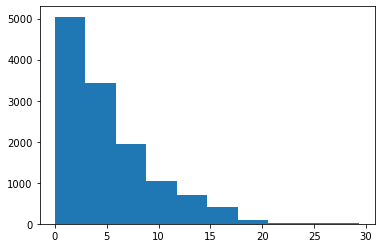

In [29]:
plt.hist(df["var"].to_numpy())
plt.show()

In [57]:
df2 = df.reset_index().fillna(0)
df3 = df2[["lat","lon","var"]].to_numpy()
df3

array([[-8.9750e+01,  2.5000e-01,  0.0000e+00],
       [-8.9750e+01,  7.5000e-01,  0.0000e+00],
       [-8.9750e+01,  1.2500e+00,  0.0000e+00],
       ...,
       [ 8.9750e+01,  3.5875e+02,  0.0000e+00],
       [ 8.9750e+01,  3.5925e+02,  0.0000e+00],
       [ 8.9750e+01,  3.5975e+02,  0.0000e+00]])

(360, 720)


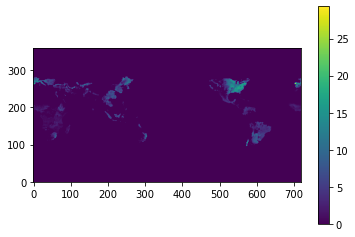

(360, 720)

In [58]:
df4 = df3[:,2].reshape((360,720))
print(df4.shape)
plt.imshow(df4, origin="lower")
plt.colorbar()
plt.show()
df5 = np.concatenate((df4[:,-360:],df4[:,:360]), axis=1) # 0-360 lon to -180 - 180 lon
df5.shape

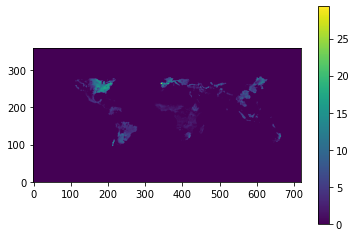

In [59]:
plt.imshow(df5, origin="lower")
plt.colorbar()

In [62]:
df6a = df5[2::2,2::2]
#df6a = np.concatenate((df6a,))
df6b = df5[1:-1:2,1:-1:2]
print(df6a.shape)
print(df6b.shape)
df7= df6a+df6b
df8 = np.zeros((181,360))
df8[1:-1,1:] = df7
df8.shape

(179, 359)
(179, 359)


(181, 360)

In [66]:
# reads the crop datasets
maize_list = []
for year in range(1981,2017):
    df = xr.open_dataset("Documents/IANNwTF/project/gdhy_v1.2_v1.3_20190128/maize/yield_{}.nc4".format(year))
    df = df.to_dataframe()
    df2 = df.reset_index().fillna(0)
    df3 = df2["var"].to_numpy()
    df4 = df3.reshape((360,720))
    df5 = np.concatenate((df4[:,-360:],df4[:,:360]), axis=1) # 0-360 lon to -180 - 180 lon
    df6a = df5[2::2,2::2]
    df6b = df5[1:-1:2,1:-1:2]
    df7= df6a+df6b
    df8 = np.zeros((181,360))
    df8[1:-1,1:] = df7
    #print(df8.shape)
    #plt.imshow(df8, origin="lower")
    #plt.show()
    maize_list.append([year,df5])

(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)
(181, 360)


In [119]:
maize_list[0]

[1981,
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)]

In [2]:
df = xr.open_dataset("Documents/IANNwTF/project/era5_2m_temperature_daily_1950 (1).nc")
df

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 181, longitude: 360, time: 365)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01T11:00:00 ... 1950-12-31T11:00:00
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Dec 23 12:04:06 2020: cdo daymean /p/projects/ou/labs/a...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [3]:
df1 = df.to_dataframe()
df1

time_bnds         t2m
bnds latitude longitude time                                               
0     90.0    0.0       1950-01-01 11:00:00 1950-01-01 00:00:00  257.925720
                        1950-01-02 11:00:00 1950-01-02 00:00:00  245.078384
                        1950-01-03 11:00:00 1950-01-03 00:00:00  242.080597
                        1950-01-04 11:00:00 1950-01-04 00:00:00  246.042877
                        1950-01-05 11:00:00 1950-01-05 00:00:00  247.693161
...                                                         ...         ...
1    -90.0    359.0     1950-12-27 11:00:00 1950-12-27 23:00:00  250.879440
                        1950-12-28 11:00:00 1950-12-28 23:00:00  248.701782
                        1950-12-29 11:00:00 1950-12-29 23:00:00  247.689163
                        1950-12-30 11:00:00 1950-12-30 23:00:00  246.024841
                        1950-12-31 11:00:00 1950-12-31 23:00:00  246.141144

[47566800 rows x 2 columns]

In [4]:
df2 = df1.reset_index()
df2

,bnds,latitude,longitude,time,time_bnds,t2m
0,0,90.0,0.0,1950-01-01 11:00:00,1950-01-01 00:00:00,257.925720
1,0,90.0,0.0,1950-01-02 11:00:00,1950-01-02 00:00:00,245.078384
2,0,90.0,0.0,1950-01-03 11:00:00,1950-01-03 00:00:00,242.080597
3,0,90.0,0.0,1950-01-04 11:00:00,1950-01-04 00:00:00,246.042877
4,0,90.0,0.0,1950-01-05 11:00:00,1950-01-05 00:00:00,247.693161
...,...,...,...,...,...,...
47566795,1,-90.0,359.0,1950-12-27 11:00:00,1950-12-27 23:00:00,250.879440
47566796,1,-90.0,359.0,1950-12-28 11:00:00,1950-12-28 23:00:00,248.701782
47566797,1,-90.0,359.0,1950-12-29 11:00:00,1950-12-29 23:00:00,247.689163
47566798,1,-90.0,359.0,1950-12-30 11:00:00,1950-12-30 23:00:00,246.024841


In [5]:
print(df2.dtypes)
df3 = df2.groupby([pd.Grouper(key="time", freq="M"), "latitude" ,"longitude"])["t2m"].mean().to_frame()
df3

bnds                  int64
latitude            float64
longitude           float64
time         datetime64[ns]
time_bnds    datetime64[ns]
t2m                 float32
dtype: object


t2m
time       latitude longitude            
1950-01-31 -90.0    0.0        246.150650
                    1.0        246.150650
                    2.0        246.150650
                    3.0        246.150650
                    4.0        246.150650
...                                   ...
1950-12-31  90.0    355.0      243.426682
                    356.0      243.426682
                    357.0      243.426682
                    358.0      243.426682
                    359.0      243.426682

[781920 rows x 1 columns]

In [6]:
ds = df3.to_xarray()
ds.to_netcdf("Documents/IANNwTF/project/era5_2m_temperature_monthly_resolution_100/era5_2m_temperature_monthly_1950.nc")

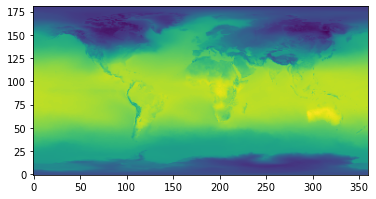

In [7]:
df4 = df3.reset_index()
df5 = df4["t2m"].to_numpy()
df6 = df5[:181*360].reshape((181,360))
df7 = np.concatenate((df6[:,-180:],df6[:,:180]), axis=1) # 0-360 lon to -180 - 180 lon
plt.imshow(df7, origin="lower")
plt.show()

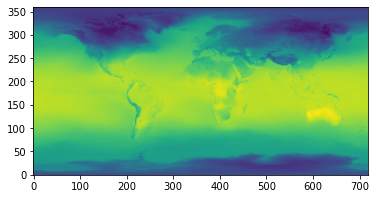

array([[246.15065002, 246.15065002, 246.15065002, ..., 246.15065002,
        246.15065002, 246.15065002],
       [246.30349731, 246.33383179, 246.33383179, ..., 246.25575256,
        246.27963257, 246.27963257],
       [246.30349731, 246.33383179, 246.33383179, ..., 246.25575256,
        246.27963257, 246.27963257],
       ...,
       [240.58361816, 240.57836914, 240.57836914, ..., 240.57159424,
        240.57772827, 240.57772827],
       [240.79577637, 240.79577637, 240.79577637, ..., 240.79577637,
        240.79577637, 240.79577637],
       [240.79577637, 240.79577637, 240.79577637, ..., 240.79577637,
        240.79577637, 240.79577637]])

In [8]:
# only semi useful
df4 = df3.reset_index()
df5 = df4["t2m"].to_numpy()
df6 = df5[:181*360].reshape((181,360))
df7 = np.concatenate((df6[:,-180:],df6[:,:180]), axis=1) # 0-360 lon to -180 - 180 lon
b = np.zeros((181*2,360*2))
b[::2,::2] = df7
# Define the convolution kernel
kernel_1d = scipy.signal.boxcar(2)
kernel_2d = np.outer(kernel_1d, kernel_1d)

# Apply the kernel by convolution, seperately in each axis
c = scipy.signal.convolve(b, kernel_2d, mode="valid")
plt.imshow(c, origin="lower")
plt.show()
c

In [10]:
# builds the temperature dataset
for year in range(1950,2020):
    df = xr.open_dataset("Documents/IANNwTF/project/era5_2m_temperature_daily_resolution_100/era5_2m_temperature_daily_{}.nc".format(year))
    df1 = df.to_dataframe()
    df2 = df1.reset_index()
    df3 = df2.groupby([pd.Grouper(key="time", freq="M"), "latitude" ,"longitude"])["t2m"].mean().to_frame()
    #df4 = df3.reset_index()
    ds = df3.to_xarray()
    ds.to_netcdf("Documents/IANNwTF/project/era5_2m_temperature_monthly_resolution_100/era5_2m_temperature_monthly_{}.nc".format(year))

In [3]:
# reads the rain dataset 
ds = xr.open_dataset("era5_total_precipitation_monthly_resolution_100/era5_total_precipitation_monthly_1950.nc")
df = ds.to_dataframe()
df.reset_index(inplace=True)
df

,latitude,longitude,time,tp
0,-90.0,0.0,1950-01-31,0.000188
1,-90.0,0.0,1950-02-28,0.000060
2,-90.0,0.0,1950-03-31,0.000154
3,-90.0,0.0,1950-04-30,0.000202
4,-90.0,0.0,1950-05-31,0.000129
...,...,...,...,...
781915,90.0,359.0,1950-08-31,0.000660
781916,90.0,359.0,1950-09-30,0.001336
781917,90.0,359.0,1950-10-31,0.000731
781918,90.0,359.0,1950-11-30,0.000410


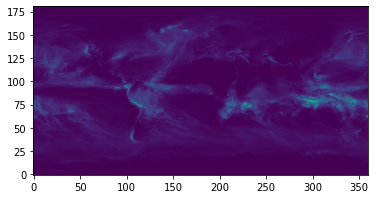

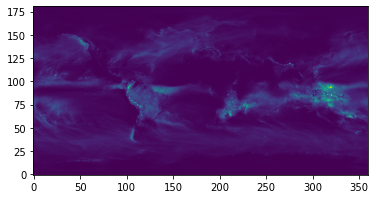

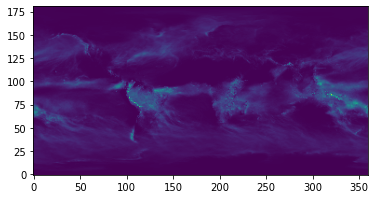

In [4]:
# shows the rain dataset
df2 = df["tp"].to_numpy()
for month in range(3):
    df1 = df2[month::12]
    df1 = df1[:181*360].reshape((181,360))
    df1 = np.concatenate((df1[:,-180:],df1[:,:180]), axis=1) # 0-360 lon to -180 - 180 lon
    plt.imshow(df1, origin="lower")
    plt.show()
#df1

In [12]:
# builds the rain dataset
for year in range(1950,2020):
    df = xr.open_dataset("Documents/IANNwTF/project/era5_total_precipitation_daily_resolution_100/era5_total_precipitation_daily_{}.nc".format(year)
    df1 = df.to_dataframe()
    df2 = df1.reset_index()
    df3 = df2.groupby([pd.Grouper(key="time", freq="M"), "latitude" ,"longitude"])["tp"].mean().to_frame()
    #df4 = df3.reset_index()
    ds = df3.to_xarray()
    ds.to_netcdf("Documents/IANNwTF/project/era5_total_precipitation_monthly_resolution_100/era5_total_precipitation_monthly_{}.nc".format(year))

In [6]:
xr.open_dataset("Documents/IANNwTF/project/mpi-esm1-2-hr_r1i1p1f1_w5e5_ssp126_tas_global_daily_2015_2020 (1).nc")

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 72, time: 2192)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2020-12-31T12:00:00
  * lon      (lon) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
Data variables:
    tas      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Dec 17 13:57:27 2020: cdo remapbil,50_grid_params /p/pr...
    institution:  Potsdam Institute for Climate Impact Research (PIK)
    title:        ISIMIP3b bias-adjusted climate input data
    project:      Inter-Sectoral Impact Model Intercomparison Project phase 3...
    contact:      ISIMIP cross-sectoral science team <info@isimip.org> <https...
    summary:      CMIP6 daily output data bias-adjusted and statistically dow...
    references:   Lange (2019) <https://doi.org/10.5194/gmd-12-3055-2019> and...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [68]:
ds = xr.open_dataset("Documents/IANNwTF/project/degree_points_land.nc")
df = ds.to_dataframe()
df.reset_index(inplace=True)
df

,lat,lon,land
0,-90,0,0
1,-90,1,0
2,-90,2,0
3,-90,3,0
4,-90,4,0
...,...,...,...
65155,90,355,0
65156,90,356,0
65157,90,357,0
65158,90,358,0


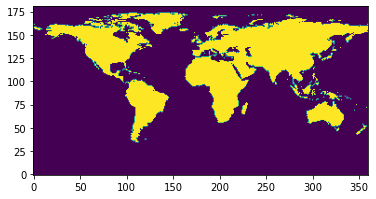

In [70]:
df1 = df["land"].to_numpy()

df1 = df1.reshape((181,360))
df1 = np.concatenate((df1[:,-180:],df1[:,:180]), axis=1) # 0-360 lon to -180 - 180 lon
plt.imshow(df1, origin="lower")
plt.show()

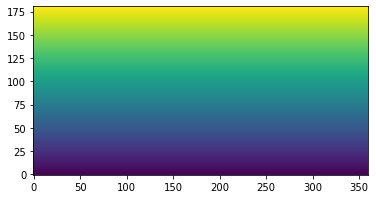

In [71]:
df1 = df["lat"].to_numpy()

df1 = df1.reshape((181,360))
df1 = np.concatenate((df1[:,-180:],df1[:,:180]), axis=1) # 0-360 lon to -180 - 180 lon
plt.imshow(df1, origin="lower")
plt.show()

In [76]:
df = xr.open_dataset("Documents/IANNwTF/project/gdhy_crops/maize/yield_1981.nc4".format(year))
df

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720)
Coordinates:
  * lon      (lon) float64 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Data variables:
    var      (lat, lon) float32 ...